<a href="https://colab.research.google.com/github/ZAINABALBALUSHI/Mining-and-Predictive-Analytics/blob/main/ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

data = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

Read Training Data
The training set is read locally and the head function is used to display the data for intial understanding

"======Data understanding======"

In [4]:
dataTrain=pd.read_csv('test.csv')

dataTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The shape function displays the number of rows and columns in the training set

In [5]:
dataTrain.shape

(1459, 80)

In [6]:
dataTrain.columns #to know the column names

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
dataTrain['Neighborhood'].unique()
 ##to know the unique manufacturer names

array(['NAmes', 'Gilbert', 'StoneBr', 'BrDale', 'NPkVill', 'NridgHt',
       'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'NWAmes',
       'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr',
       'Crawfor', 'Blueste', 'IDOTRR', 'Mitchel', 'Timber', 'MeadowV',
       'Veenker'], dtype=object)

In [10]:
dataTrain['Neighborhood'].value_counts()
 ##to know the unique manufacturer names

,count
Neighborhood,
NAmes,218
OldTown,126
CollgCr,117
Somerst,96
Edwards,94
NridgHt,89
Gilbert,86
Sawyer,77
SawyerW,66


Read Testing Data
The testing set is read locally and the head function is used to display the data for intial understanding

In [11]:
dataTest=pd.read_csv('test.csv')
dataTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The shape function displays the number of rows and columns in the testing set

In [12]:
dataTest.shape

(1459, 80)

Checking for null values in each column and displaying the sum of all null values in each column (Training Set)

In [13]:
dataTrain.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


Checking for null values in each column and displaying the sum of all null values in each column (Testing Set)

In [14]:
dataTest.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


Removing the rows with empty values since the number of empty rows are small. This is the best approach compared to replacing with mean or random values

In [15]:
dataTrain=dataTrain.dropna()
dataTest=dataTest.dropna()

Checking if null values are eliminated (Training set)

In [16]:
dataTrain.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [17]:
dataTrain.shape

(0, 80)

Checking if null values are eliminated (Testing set)

In [18]:
dataTest.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


In [19]:
dataTest.shape

(0, 80)

Checking the data types to see if all the data is in correct format. All the data seems to be in their required format.

In [20]:
dataTrain.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MiscVal,int64
MoSold,int64
YrSold,int64
SaleType,object


Checking the correlation between the numerical features

EDA (Exploratory Data Analysis)
Visualizations are used to understand the relationship between the target variable and the features, in addition to correlation coefficient and p-value. The visuals include heatmap, scatterplot,boxplot etc.

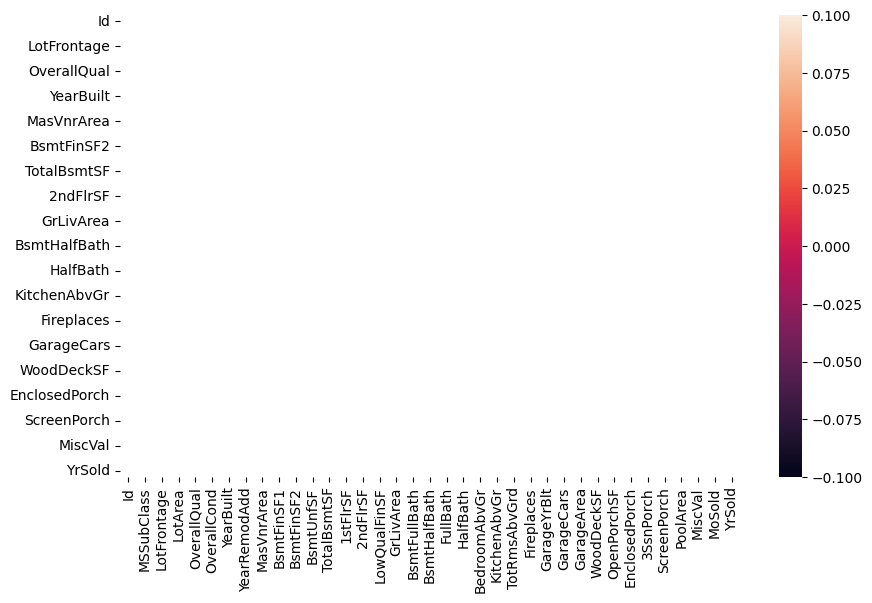

In [25]:
plt.figure(figsize=(10,6))
numerical_features = dataTrain.select_dtypes(include=['number']).columns
corr = dataTrain[numerical_features].corr()
sns.heatmap(corr,annot=True)
plt.show()


Some features, such as is_exchangeable and duration_listed with price_usd, show weak correlations (close to zero), indicating minimal linear relationships.
year_produced has a strong positive correlation with price_usd (0.7), making it the most significant numerical feature for predicting the target variable.
engine_capacity shows a moderate positive correlation with price_usd (0.3), suggesting some influence on price.
has_warranty exhibits a weak positive correlation (0.28) with price_usd.
Key Insight:
Among the numerical features, year_produced is the best predictor for price_usd, given its strong correlation.

Regression/scatter Plot
This regression plot show the relation between odometer and price. A slight negative correlation is observed this shows that price is being affected by the change in odometer value.

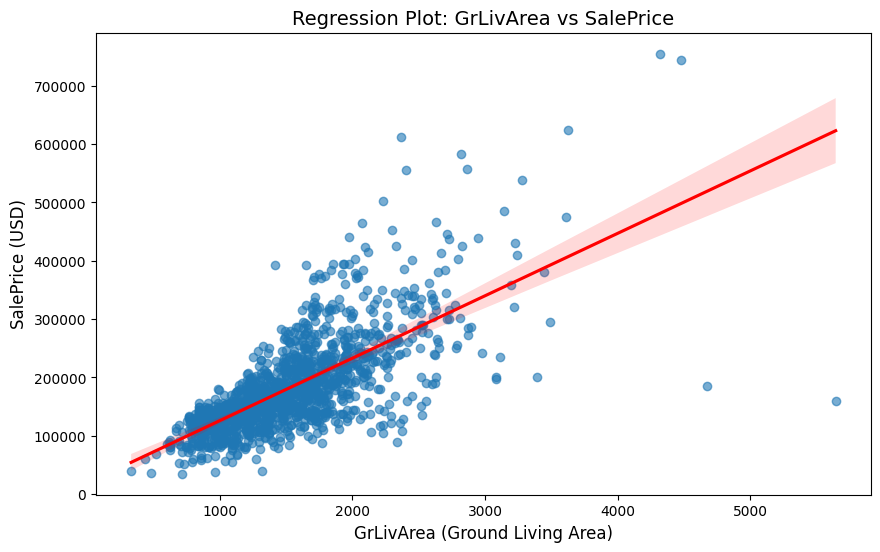

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x="GrLivArea", y="SalePrice", data=dataTrain, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Regression Plot: GrLivArea vs SalePrice", fontsize=14)
plt.xlabel("GrLivArea (Ground Living Area)", fontsize=12)
plt.ylabel("SalePrice (USD)", fontsize=12)
plt.show()

As observed in the plot, a negative correlation is present between the feature (odometer_value) and the target variable (price_usd). This indicates that as the odometer value increases, the price of the vehicle decreases. Such a trend highlights that higher mileage or usage leads to lower resale values.

In [35]:
from scipy import stats

# Replace 'odometer_value' with the actual column name representing mileage or usage in your dataset
# For example, if the column is named 'Mileage', use:
pearson_coef, p_value = stats.pearsonr(dataTrain['GrLivArea'], dataTrain['SalePrice'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7086244776126522  with a P-value of P = 4.518033646776417e-223


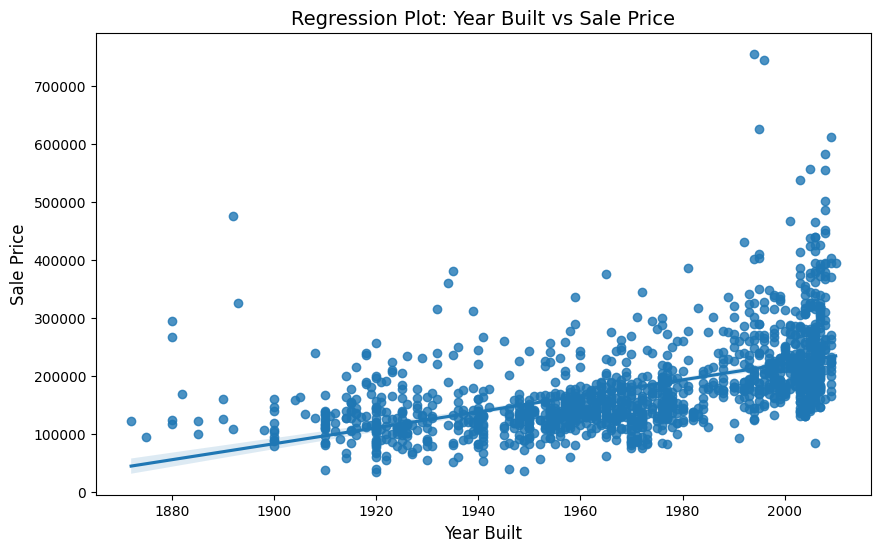

In [37]:
plt.figure(figsize=(10,6))
# Assuming 'year_produced' is the correct column name
# If not, replace with the actual column name from your DataFrame
sns.regplot(x="YearBuilt", y="SalePrice", data=dataTrain)
plt.title("Regression Plot: Year Built vs Sale Price", fontsize=14) # Set plot title
plt.xlabel("Year Built", fontsize=12)  # Set x-axis label
plt.ylabel("Sale Price", fontsize=12)  # Set y-axis label
plt.show()

In [42]:
# Calculate the Pearson correlation coefficient and p-value
# Use 'dataTrain' instead of 'data_train' to access the correct DataFrame
pearson_coef, p_value = stats.pearsonr(dataTrain['YearBuilt'], dataTrain['SalePrice'])

# Display the results
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5228973328794969 with a P-value of P = 2.9902290990137165e-103


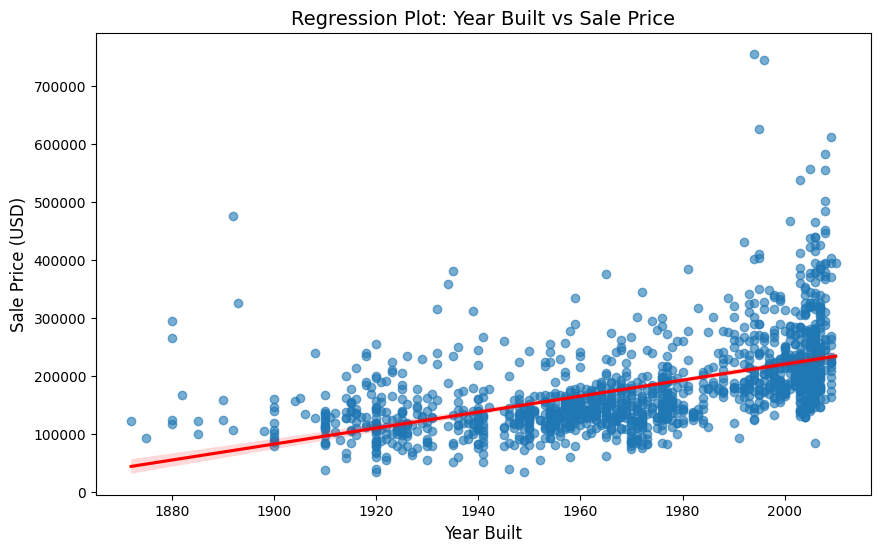

In [46]:
plt.figure(figsize=(10, 6))
sns.regplot(x="YearBuilt", y="SalePrice", data=dataTrain, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}) # Changed data_train to dataTrain
plt.title("Regression Plot: Year Built vs Sale Price", fontsize=14)
plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Sale Price (USD)", fontsize=12)
plt.show()

In [50]:
pearson_coef, p_value = stats.pearsonr(dataTrain['YearBuilt'], dataTrain['SalePrice']) # Changed data_train to dataTrain
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5228973328794969 with a P-value of P = 2.9902290990137165e-103


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

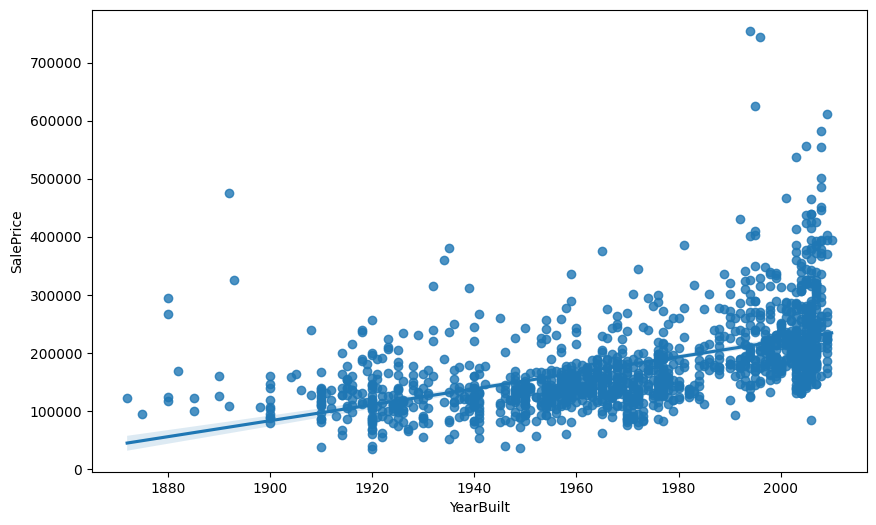

In [52]:
plt.figure(figsize=(10,6))
sns.regplot(x="YearBuilt", y="SalePrice", data=dataTrain)

In [53]:
pearson_coef, p_value = stats.pearsonr(dataTrain['YearBuilt'], dataTrain['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5228973328794969  with a P-value of P = 2.9902290990137165e-103


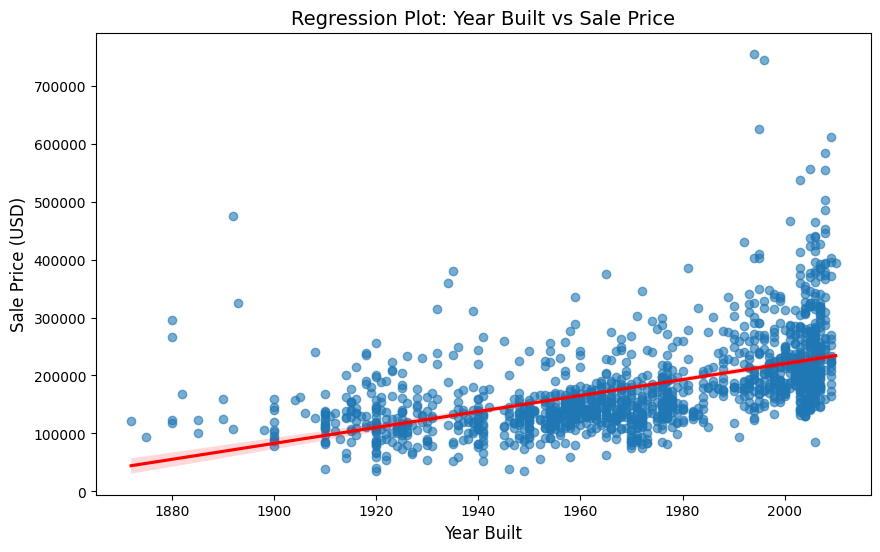

In [55]:
plt.figure(figsize=(10, 6))
# Replace 'data_train' with 'dataTrain' (correct DataFrame name)
# Replace 'engine_capacity' with the correct column name for engine capacity if it's different
sns.regplot(x="YearBuilt", y="SalePrice", data=dataTrain, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Regression Plot: Year Built vs Sale Price", fontsize=14)
plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Sale Price (USD)", fontsize=12)
plt.show()

In [56]:
pearson_coef, p_value = stats.pearsonr(dataTrain['YearBuilt'], dataTrain['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5228973328794969  with a P-value of P = 2.9902290990137165e-103


Box Plot
These plots are used for categorical data to determine the importance of features for prediction.

In the given plot below, it is observed that the price range vary for automatic and manual transmisson. This indicates the categories can vary with price hence feature can be used for prediction

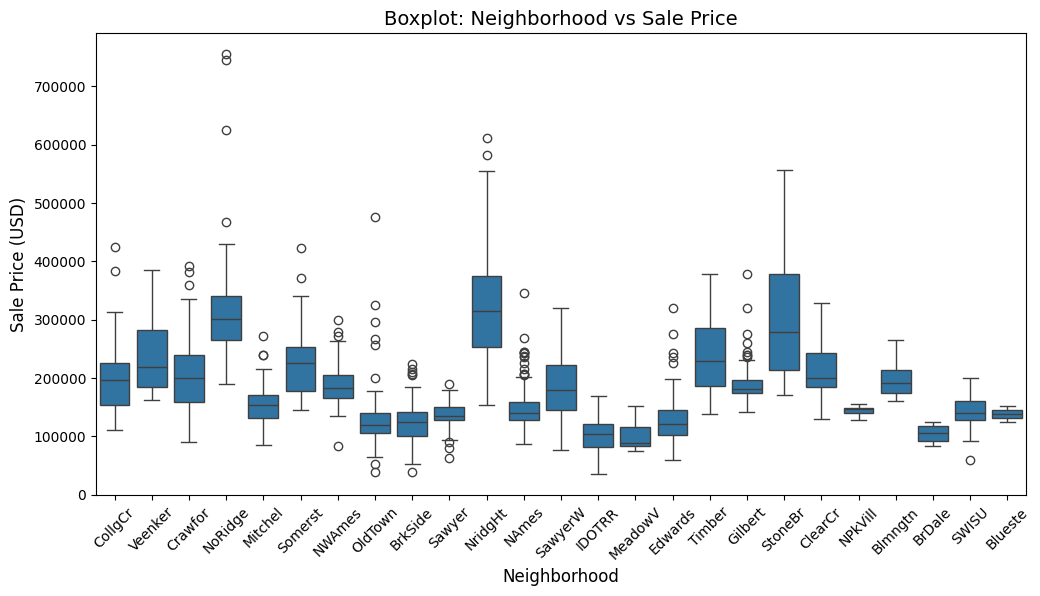

In [58]:
plt.figure(figsize=(12, 6))
# Assuming your training data is in 'dataTrain' and not 'data_train'
sns.boxplot(x="Neighborhood", y="SalePrice", data=dataTrain)
plt.title("Boxplot: Neighborhood vs Sale Price", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Sale Price (USD)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

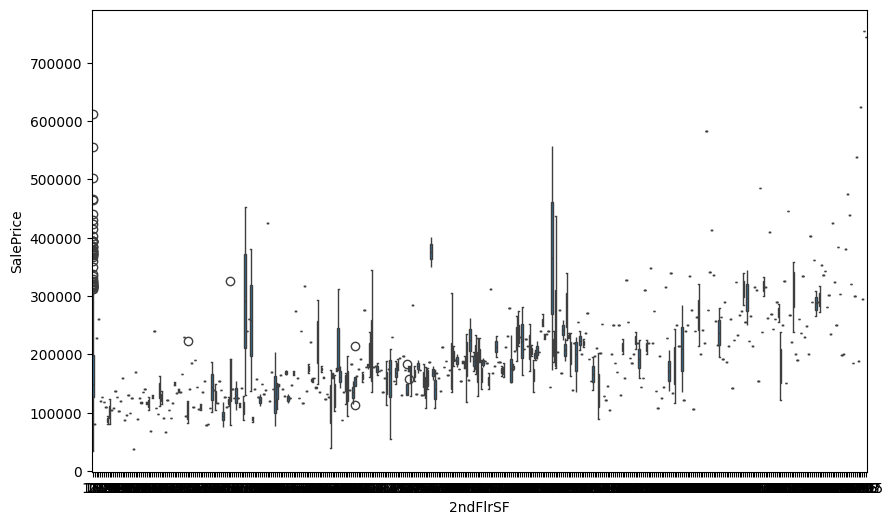

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(x="2ndFlrSF", y="SalePrice", data=dataTrain)

<Axes: xlabel='Electrical', ylabel='SalePrice'>

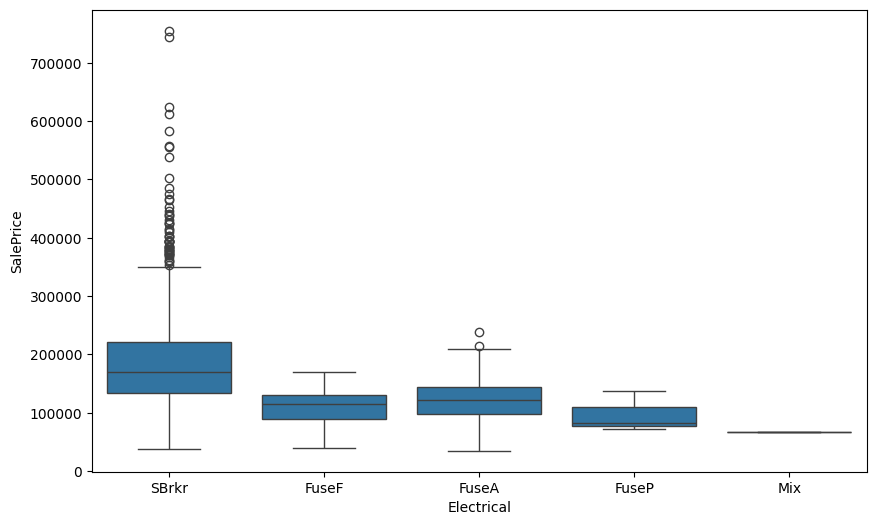

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Electrical", y="SalePrice", data=dataTrain)

<Axes: xlabel='BsmtFullBath', ylabel='SalePrice'>

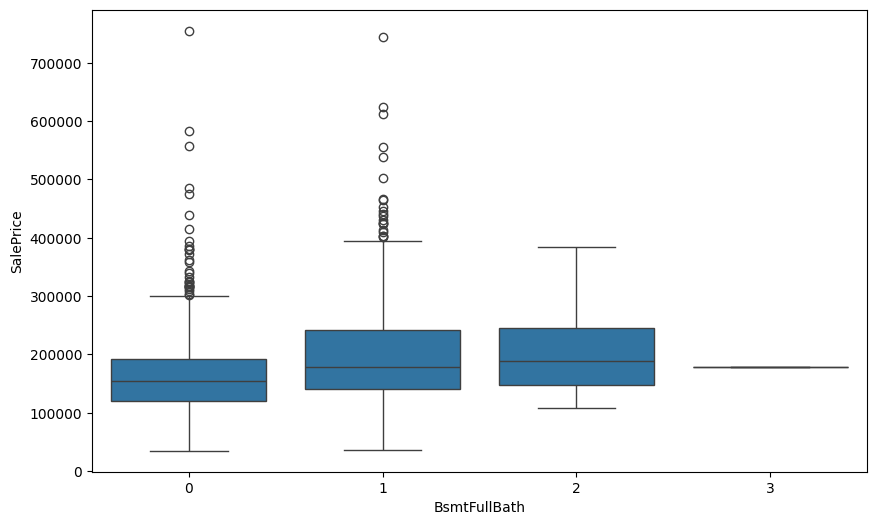

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x="BsmtFullBath", y="SalePrice", data=dataTrain)

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

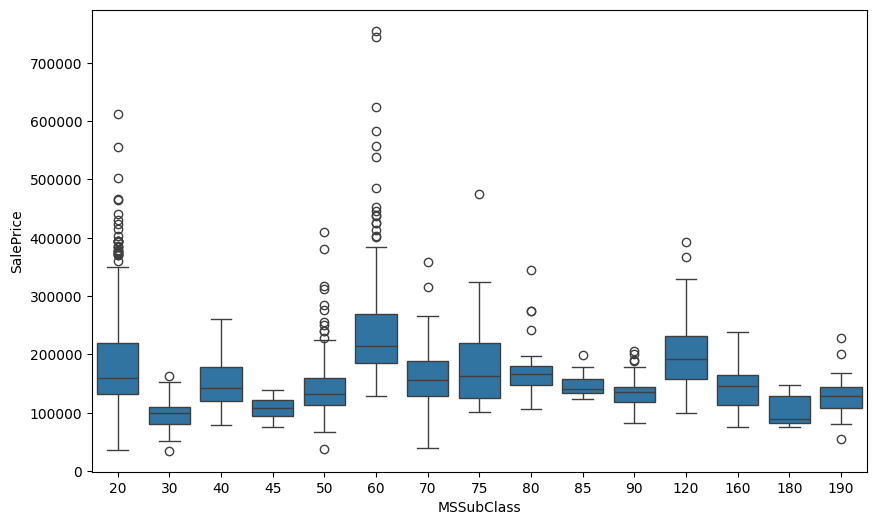

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x="MSSubClass", y="SalePrice", data=dataTrain)

<Axes: xlabel='Street', ylabel='SalePrice'>

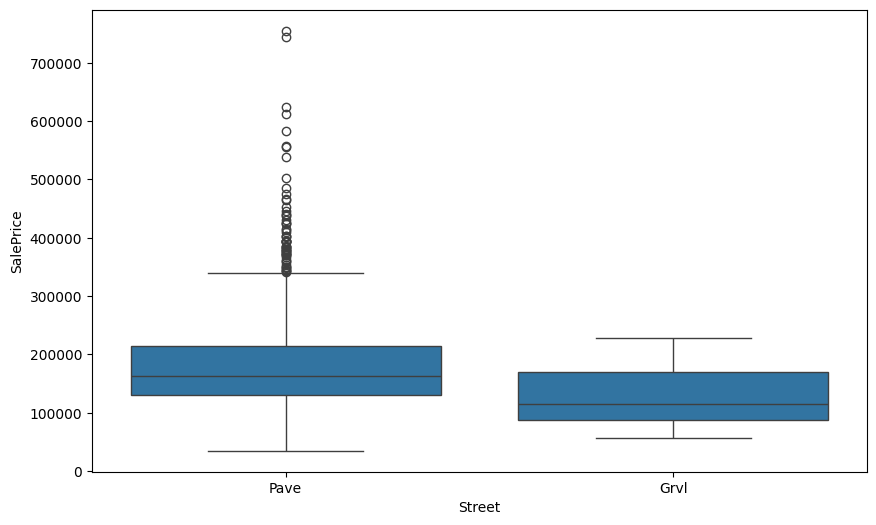

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Street", y="SalePrice", data=dataTrain)

<Axes: xlabel='Condition1', ylabel='SalePrice'>

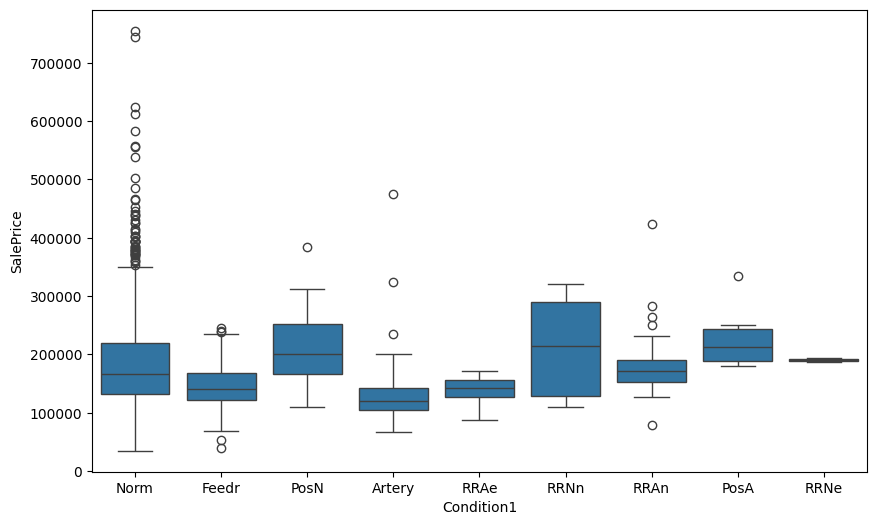

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Condition1", y="SalePrice", data=dataTrain)

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

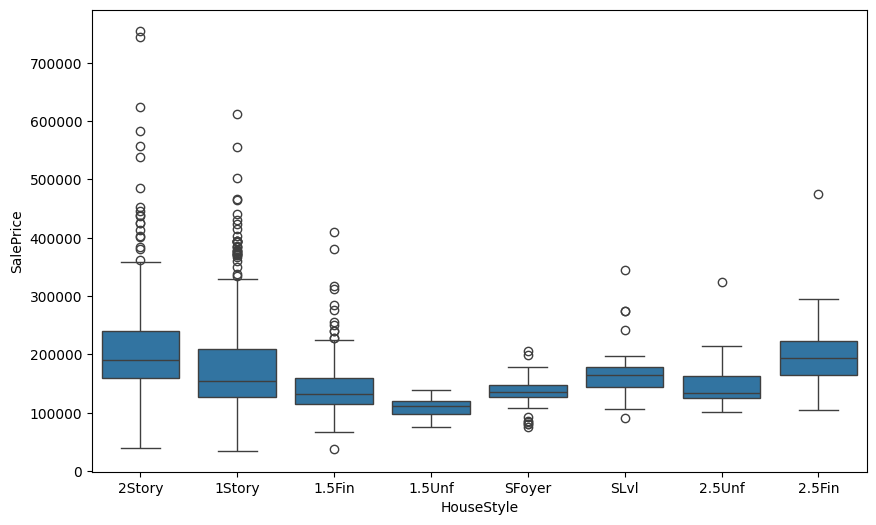

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(x="HouseStyle", y="SalePrice", data=dataTrain)

In [73]:
column_names = dataTrain.columns.tolist()
column_names

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'